In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import optuna
import plotly.express as px
import kmeans

# Visualizing MNIST

In [2]:
#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

In [3]:
#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]


inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

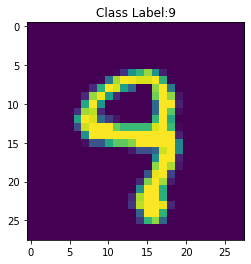

In [4]:
#show the 10'th train image
i=10
im = images_train[i,:].reshape((28,28),order='F')
plt.imshow(im)
plt.title('Class Label:'+str(labels_train[i][0]))
plt.show()

# K Means- Lloyd's Algorithm

### Model Analysis

In [8]:
rand_scores = []
rand_scores.append(model.rand_score())

In [13]:
images_train = np.array([x.flatten() for x in images_train])
for i in range(3):
    model = kmeans.kMeans()
    model.train(images_train, labels_train)
    rand_scores.append(model.rand_score())

Updating. 18556 points changed.
Updating. 10811 points changed.
Updating. 6589 points changed.
Updating. 4471 points changed.
Updating. 3138 points changed.
Updating. 2212 points changed.
Updating. 1773 points changed.
Updating. 1663 points changed.
Updating. 1480 points changed.
Updating. 1308 points changed.
Updating. 1158 points changed.
Updating. 1068 points changed.
Updating. 997 points changed.
Updating. 1005 points changed.
Updating. 949 points changed.
Updating. 894 points changed.
Updating. 845 points changed.
Updating. 736 points changed.
Updating. 653 points changed.
Updating. 534 points changed.
Updating. 417 points changed.
Updating. 296 points changed.
Updating. 246 points changed.
Updating. 201 points changed.
Updating. 173 points changed.
Updating. 150 points changed.
Updating. 138 points changed.
Updating. 113 points changed.
Updating. 97 points changed.
Updating. 103 points changed.
Updating. 94 points changed.
Updating. 61 points changed.
Updating. 56 points changed.

Updating. 538 points changed.
Updating. 553 points changed.
Updating. 543 points changed.
Updating. 558 points changed.
Updating. 576 points changed.
Updating. 573 points changed.
Updating. 615 points changed.
Updating. 639 points changed.
Updating. 643 points changed.
Updating. 655 points changed.
Updating. 592 points changed.
Updating. 523 points changed.
Updating. 423 points changed.
Updating. 381 points changed.
Updating. 322 points changed.
Updating. 269 points changed.
Updating. 231 points changed.
Updating. 210 points changed.
Updating. 177 points changed.
Updating. 137 points changed.
Updating. 153 points changed.
Updating. 151 points changed.
Updating. 157 points changed.
Updating. 132 points changed.
Updating. 126 points changed.
Updating. 107 points changed.
Updating. 93 points changed.
Updating. 108 points changed.
Updating. 124 points changed.
Updating. 149 points changed.
Updating. 143 points changed.
Updating. 142 points changed.
Updating. 132 points changed.
Updating. 1

In [5]:
model.get_cluster_labels()

[6, 9, 4, 7, 2, 0, 8, 1, 3, 1]


In [6]:
model.rand_score()

0.8797502391706529

In [7]:
model.cluster_counts()

[5395, 7238, 5416, 6690, 4635, 4975, 7065, 5297, 7791, 5498]

In [14]:
rand_scores

[0.8797502391706529,
 0.8867041722917605,
 0.8797502391706529,
 0.8797502391706529]

In [16]:
km_model = kmeans.kMeans()
km_model.train(images_train, labels_train)

Updating. 14779 points changed.
Updating. 8743 points changed.
Updating. 6335 points changed.
Updating. 4481 points changed.
Updating. 3001 points changed.
Updating. 2313 points changed.
Updating. 1990 points changed.
Updating. 1862 points changed.
Updating. 1768 points changed.
Updating. 1633 points changed.
Updating. 1465 points changed.
Updating. 1260 points changed.
Updating. 1064 points changed.
Updating. 853 points changed.
Updating. 685 points changed.
Updating. 507 points changed.
Updating. 387 points changed.
Updating. 293 points changed.
Updating. 265 points changed.
Updating. 226 points changed.
Updating. 184 points changed.
Updating. 185 points changed.
Updating. 151 points changed.
Updating. 131 points changed.
Updating. 109 points changed.
Updating. 103 points changed.
Updating. 87 points changed.
Updating. 92 points changed.
Updating. 90 points changed.
Updating. 88 points changed.
Updating. 65 points changed.
Updating. 54 points changed.
Updating. 59 points changed.
Upd

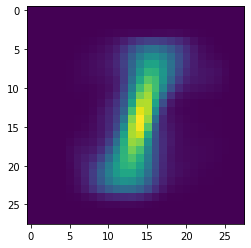

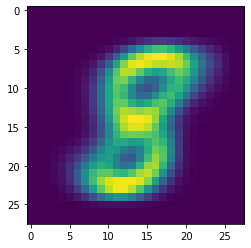

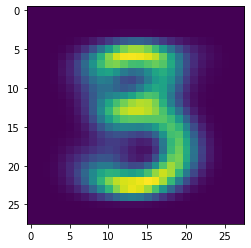

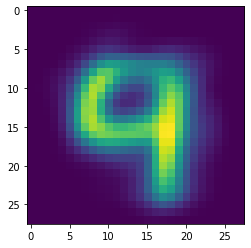

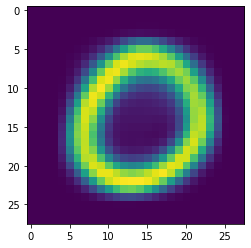

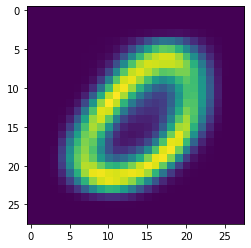

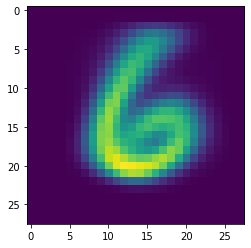

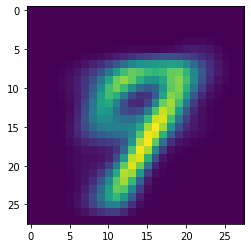

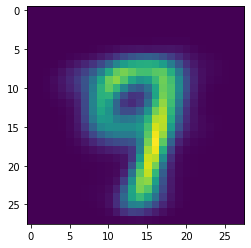

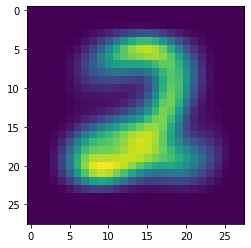

In [25]:
for i in range(10):
    im = km_model.centers[i].reshape((28,28),order='F')
    plt.imshow(im)
    plt.show()

# Spectral Clustering

In [5]:
import spectral_clustering

### Hyperparameter Tuning

#### Using Gaussian Kernel

In [17]:
sigma = [0.5, 5, 10, 20, 50]
rand_scores = []
for sigma in sigma:
    model = spectral_clustering.spectralClustering(sigma=sigma)
    model.cluster(images_train[:4000], labels_train[:4000])
    rand_scores.append(model.rand_score())

Updating. 2216 points changed.
Updating. 758 points changed.
Updating. 185 points changed.
Updating. 138 points changed.
Updating. 65 points changed.
Updating. 27 points changed.
Updating. 35 points changed.
Updating. 24 points changed.
Updating. 11 points changed.
Updating. 4 points changed.
Updating. 4 points changed.
Updating. 1 points changed.
Updating. 2771 points changed.
Updating. 2498 points changed.
Updating. 465 points changed.
Updating. 288 points changed.
Updating. 88 points changed.
Updating. 30 points changed.
Updating. 22 points changed.
Updating. 19 points changed.
Updating. 4 points changed.
Updating. 1 points changed.
Updating. 1355 points changed.
Updating. 765 points changed.
Updating. 585 points changed.
Updating. 409 points changed.
Updating. 382 points changed.
Updating. 517 points changed.
Updating. 267 points changed.
Updating. 146 points changed.
Updating. 97 points changed.
Updating. 88 points changed.
Updating. 81 points changed.
Updating. 60 points changed.

In [18]:
rand_scores

[0.41982908227056764,
 0.12035196299074769,
 0.12977719429857465,
 0.16046511627906976,
 0.1505388847211803]

In [5]:
sigma = [0.1, 0.01, 0.001, 0.0001]
rand_scores = []
for sigma in sigma:
    model = spectral_clustering.spectralClustering(sigma=sigma)
    model.cluster(images_train[:4000], labels_train[:4000])
    rand_scores.append(model.rand_score())

C:\Users\nammy\anaconda3\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\nammy\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nammy\Desktop\MAT270-hw2\kmeans.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(new_centers), points_changed


Updating. 3554 points changed.
Updating. 905 points changed.
Updating. 3602 points changed.
Updating. 88 points changed.
Updating. 65 points changed.
Updating. 14 points changed.
Updating. 6 points changed.
Updating. 4 points changed.
Updating. 1 points changed.


C:\Users\nammy\anaconda3\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\nammy\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nammy\Desktop\MAT270-hw2\kmeans.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(new_centers), points_changed
C:\Users\nammy\anaconda3\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\nammy\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nammy\Desktop\MAT270-hw2\km

In [7]:
rand_scores

[0.21614428607151787,
 0.10020417604401101,
 0.10020417604401101,
 0.10020417604401101]

#### Using KNN

In [6]:
neighbors = [5, 10, 20, 50]
rand_scores = []
for neighbor in neighbors:
    model = spectral_clustering.spectralClustering(neighbors=neighbor)
    model.cluster(images_train[:4000], labels_train[:4000])
    rand_scores.append(model.rand_score())

Updating. 646 points changed.
Updating. 343 points changed.
Updating. 347 points changed.
Updating. 256 points changed.
Updating. 152 points changed.
Updating. 144 points changed.
Updating. 120 points changed.
Updating. 111 points changed.
Updating. 95 points changed.
Updating. 65 points changed.
Updating. 51 points changed.
Updating. 44 points changed.
Updating. 41 points changed.
Updating. 28 points changed.
Updating. 33 points changed.
Updating. 37 points changed.
Updating. 37 points changed.
Updating. 41 points changed.
Updating. 42 points changed.
Updating. 147 points changed.
Updating. 388 points changed.
Updating. 182 points changed.
Updating. 63 points changed.
Updating. 40 points changed.
Updating. 22 points changed.
Updating. 10 points changed.
Updating. 4 points changed.
Updating. 3 points changed.
Updating. 725 points changed.
Updating. 196 points changed.
Updating. 83 points changed.
Updating. 37 points changed.
Updating. 21 points changed.
Updating. 7 points changed.
Upda

In [7]:
rand_scores

[0.8585393848462115,
 0.8969371092773193,
 0.8693862215553888,
 0.8558562140535134]

### Testing

In [8]:
model = spectral_clustering.spectralClustering()
model.cluster(images_train[:5000], labels_train[:5000])

Updating. 584 points changed.
Updating. 173 points changed.
Updating. 86 points changed.
Updating. 49 points changed.
Updating. 22 points changed.
Updating. 20 points changed.
Updating. 16 points changed.
Updating. 11 points changed.
Updating. 15 points changed.
Updating. 12 points changed.
Updating. 8 points changed.
Updating. 6 points changed.
Updating. 1 points changed.


In [15]:
spectral_model = model

In [17]:
spectral_model.model.centers

array([[ 5.18141252e-03+0.j,  1.74572888e-03+0.j,  8.30835376e-03+0.j,
        -2.85638279e-02+0.j, -2.89311907e-02+0.j, -2.44622802e-02+0.j,
        -6.96077407e-03+0.j, -6.20473054e-03+0.j, -1.68534284e-03+0.j],
       [ 2.71491361e-03+0.j,  3.61730515e-04+0.j,  8.18163959e-03+0.j,
        -9.59051997e-03+0.j, -1.31971869e-02+0.j, -9.76956002e-03+0.j,
         2.94462670e-02+0.j,  2.96656529e-02+0.j,  7.07022347e-04+0.j],
       [ 4.11128162e-02+0.j,  4.29455349e-02+0.j, -4.79850362e-03+0.j,
         1.53742452e-03+0.j,  1.95207113e-03+0.j,  1.04351170e-03+0.j,
        -6.96019073e-04+0.j, -7.12730980e-04+0.j, -4.91886743e-04+0.j],
       [ 5.83413876e-04+0.j, -2.43605461e-05+0.j,  2.18314698e-02+0.j,
         3.12077099e-03+0.j, -7.29099621e-04+0.j,  1.47973976e-05+0.j,
         5.85748154e-04+0.j,  4.81893038e-04+0.j,  1.13751048e-02+0.j],
       [ 3.35641543e-03+0.j,  2.59452891e-03+0.j,  4.42892113e-03+0.j,
         1.42060207e-02+0.j, -3.39760955e-03+0.j, -1.65119137e-03+0.j,
  